In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_cs)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [92]:
#df = pd.read_csv('C:\ML Projects\LogAnalysis\logparser\demo\Drain_result\processed.csv_structured.csv').fillna(0)
df = pd.read_csv('C:\ML Projects\LogAnalysis\logparser\demo\Drain_result\SDK_processed.csv_structured.csv').fillna(0)
df = df.set_index('Id')
df.head()

c:\programdata\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,4,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LineId,SystemContext,MachineName,MessageSourceId,LogTime,Severity,Message,ProgramName,ProcessOSUser,MessageId,EventId,EventTemplate
Id,,,,,,,,,,,,
Id,1,SystemContext,MachineName,MessageSourceId,LogTime,Severity,Message,ProgramName,ProcessOSUser,MessageId,4c2a8fe7,Message
73439380689,2,2501328,SVPNAPI01,21422,2018-11-01 00:00:00.600,5,PInet accepted TCP/IP connection cnxn ID 16731...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...
73439380690,3,2501328,SVPNAPI01,21422,2018-11-01 00:00:00.600,4,Connection accepted: Process name: piconfig(62...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>
73439380691,4,2501328,SVPNAPI01,21422,2018-11-01 00:00:00.600,5,Successful login ID: 16731. Address: 192.168.6...,pinetmgr,pinetmgr,7076,f4ea891d,Successful login ID: <*>. Address: <*>. Host: ...
73439380692,5,2501328,SVPNAPI01,21422,2018-11-01 00:00:01.000,4,SVPNAPI01_~s_pinetmgr (814760) type PI_Type_fl...,PIPerfMon,acciona.int\SVPNAPI01$,4,179e90db,SVPNAPI01_~s_pinetmgr (<*>) type PI_Type_float...


In [93]:
#Only for event viewer
#df = df[1:].drop(['LineId','Username'],axis = 1)

#Only for SDK
df = df[1:].drop(['LineId'],axis = 1)

df.head(n=2)

,SystemContext,MachineName,MessageSourceId,LogTime,Severity,Message,ProgramName,ProcessOSUser,MessageId,EventId,EventTemplate
Id,,,,,,,,,,,
73439380689,2501328,SVPNAPI01,21422,2018-11-01 00:00:00.600,5,PInet accepted TCP/IP connection cnxn ID 16731...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...
73439380690,2501328,SVPNAPI01,21422,2018-11-01 00:00:00.600,4,Connection accepted: Process name: piconfig(62...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>


In [94]:
print("Number of messages is",df.shape[0]) #gives number of row count 
print("Number of features is",df.shape[1]-2) #gives number of col count

Number of messages is 131331
Number of features is 9


In [95]:
df.columns

Index(['SystemContext', 'MachineName', 'MessageSourceId', 'LogTime',
       'Severity', 'Message', 'ProgramName', 'ProcessOSUser', 'MessageId',
       'EventId', 'EventTemplate'],
      dtype='object')

In [96]:
df.Severity = df.Severity.astype(str)
df.Severity.unique()

array(['5', '4', '3', '2', '0'], dtype=object)

In [97]:
# Only Windows event viewer
#df.LogType = df.LogType.astype(str)
#df.LogType.unique()

In [98]:
# Only Windows event viewer
#df.Source = df.Source.astype(str)
#df.Source.unique()

df.ProgramName = df.ProgramName.astype(str)
df.ProgramName.unique()

array(['pinetmgr', 'PIPerfMon', 'pibasess', 'piarchss', 'pisnapss',
       'piupdmgr', 'random', 'PIPing', 'rmp_sk', 'pipeschd',
       'NOC Log Parser', 'SDKLogSummary', 'pibackup'], dtype=object)

In [99]:
df.EventId = df.EventId.astype(str)
df.EventId.unique()

array(['a8af9bcc', '36841c7a', 'f4ea891d', '179e90db', '46d8709d',
       '092b09d3', '505379d9', '839e40c1', '4124ae7d', '4fa51ecc',
       '4202074a', '79b2b267', '8a2748a1', '1e7c78f3', '16c0aa09',
       'b6e5c153', 'a480a86c', '5baccf5d', 'c0099c04', '7245877b',
       '88ae8876', '77f011db', '1dc15784', '26b54b3e', 'e7ce41b3',
       '2975c706', 'ca216d02', 'dbff5ede', '5397231b', '41043846',
       '3538a03e', '611707bd', '60e56c13', '876b9ae0', '21b8ae7d',
       '3a633607', '54e6fb32', 'affc9def', '50217c8b', '7143c042',
       '9d24d56c', '2cd22728', '1bd72be7', '2f2ace55', '6525c1ef',
       '460acb6d', '1a3f54cd', 'c24ce2f4', '0b235482', '49b34ed6',
       'bfcbb2d7', 'eefbc45c', 'c7d1a5d1', 'd4d2b8d5', '04607eb7',
       'ecd03a59', '3791102e', '19bc75f1', '2c8d0ec7', 'eefb249d',
       'f401a09b', 'ca30a8c4', 'd22ad119', '56f047f5', '70e01681',
       '2507fbfe', '2b75a297', '95c23ee3', '8dd7e932', 'a951c273',
       'b694cc77', 'e119f228', 'a127a342', 'b51be0d5', 'd42aa0

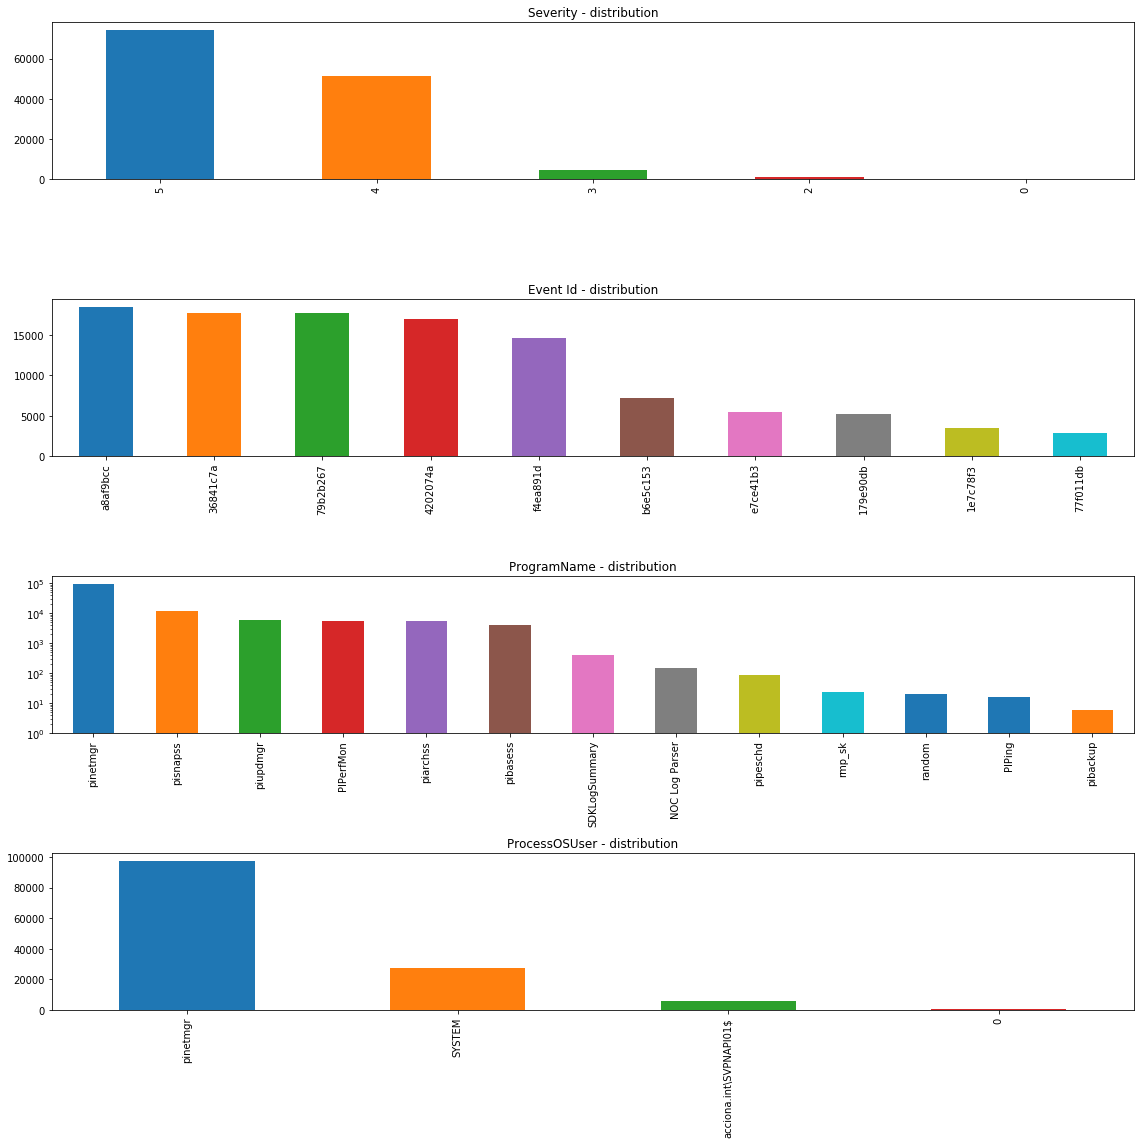

In [100]:
fig, axs  = plt.subplots(4,1,figsize=(16,16))

df["Severity"].value_counts().sort_values(ascending=False).plot.bar(ax=axs[0])
axs[0].set_title('Severity - distribution')

df["EventId"].value_counts().sort_values(ascending=False).head(n=10).plot.bar(ax=axs[1])
axs[1].set_title('Event Id - distribution')

# Only Windows event viewer

#df["LogType"].value_counts().sort_values(ascending=False).plot.bar(ax=axs[2],log = True)
#axs[2].set_title('LogType - distribution')

#df["Source"].value_counts().sort_values(ascending=False).head(n=10).plot.bar(ax=axs[3])
#axs[3].set_title('Source - distribution')

# Only SDK logs

df["ProgramName"].value_counts().sort_values(ascending=False).plot.bar(ax=axs[2],log = True)
axs[2].set_title('ProgramName - distribution')

df["ProcessOSUser"].value_counts().sort_values(ascending=False).head(n=10).plot.bar(ax=axs[3])
axs[3].set_title('ProcessOSUser - distribution')

plt.tight_layout()

In [101]:
#EventID is a token for EventTemplate. Lets output the event template with largest occurence

df["EventTemplate"].value_counts(ascending=False)[:5]
#df["EventId"].value_counts(ascending=False)[:1]

PInet accepted TCP/IP connection cnxn ID <*> Hostname: <*> <*>                                                                     18473
Connection accepted: Process name: <*> ID: <*>                                                                                     17750
ID: <*>; Duration: <*> min.; kbytes sent: <*> kbytes recv: <*> app: <*> user: <*> osuser: ; trust: <*> ip address: <*> ip host:    17718
Deleting connection: <*> Shutdown request received from <*> ID: <*> <*>                                                            16949
Successful login ID: <*>. Address: <*>. Host: . Name: <*> User: <*> OSUser: . Trust:                                               14590
Name: EventTemplate, dtype: int64

In [102]:
# Only Windows event viewer

#This message is written into the logs when the windows event viewers are exporting indicating that necessary registry keys or message DLLs might be missing. We can remove this message from the dataset without loss of information. Note that it will drop about 16% of the messages

#df = df[df.EventId != "0727e6f3"]
#df = df[df.LogDate != "1970-01-01"]

#df["EventTemplate"].value_counts(ascending=False)[:1]

In [103]:
df.dtypes

SystemContext      object
MachineName        object
MessageSourceId    object
LogTime            object
Severity           object
Message            object
ProgramName        object
ProcessOSUser      object
MessageId          object
EventId            object
EventTemplate      object
dtype: object

In [104]:
df['LogTime'] = pd.to_datetime(df['LogTime'], errors='coerce')

df['LogTime'] = df['LogTime'].dt.strftime('%d-%b-%y %H:%M:%S')

#change type to dd-mmm-yy hh:mm:ss
df['LogTime'] = df['LogTime'].astype(str)

# truncate to first 19 characters
#df['Date'] = df['LogTime'].str.slice(0,9)
#df['Time'] = df['LogTime'].str.slice(10,18)
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S')

df['Date'] = pd.to_datetime(df['LogTime']).dt.date
df['Time'] = pd.to_datetime(df['LogTime']).dt.time
df['hour'] = pd.to_datetime(df['LogTime']).dt.hour

In [105]:
df.Time[:10]

Id
73439380689    00:00:00
73439380690    00:00:00
73439380691    00:00:00
73439380692    00:00:01
73439380693    00:00:01
73439380694    00:00:01
73439380695    00:00:01
73439380696    00:00:01
73439380697    00:00:01
73439380698    00:00:01
Name: Time, dtype: object

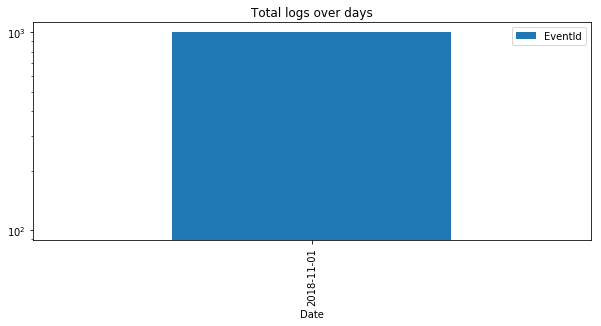

In [106]:
df.head(n=1000).loc[:, ['EventId','Date']].groupby(['Date'], as_index=True).count().plot.bar(figsize=(10,4), title = "Total logs over days", logy = "True")

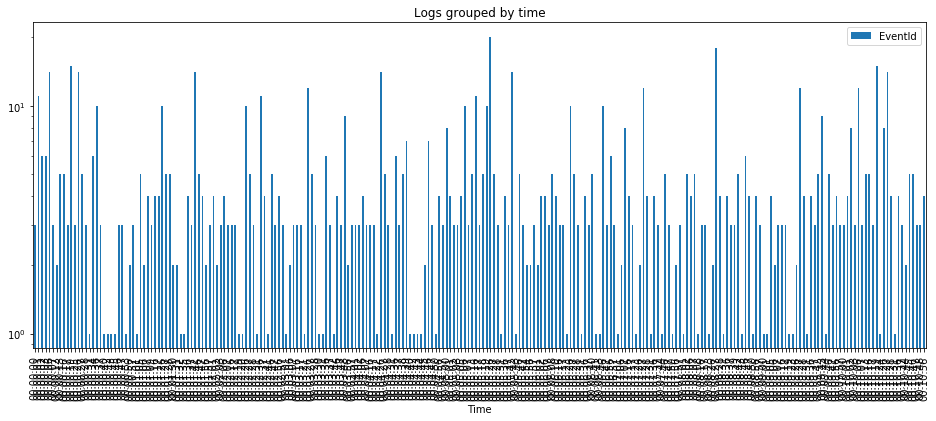

In [107]:
df.head(n=1000).loc[:, ['EventId','Time']].groupby(['Time'], as_index=True).count().plot.bar(figsize=(16,6), title = "Logs grouped by time", logy = "True")

In [108]:
df['tokens'] = pd.factorize(df.EventId)[0]
df['ClusterId'] = pd.factorize(df.EventId)[0]


In [109]:
df

,SystemContext,MachineName,MessageSourceId,LogTime,Severity,Message,ProgramName,ProcessOSUser,MessageId,EventId,EventTemplate,Date,Time,hour,tokens,ClusterId
Id,,,,,,,,,,,,,,,,
73439380689,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,5,PInet accepted TCP/IP connection cnxn ID 16731...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...,2018-11-01,00:00:00,0,0,0
73439380690,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,4,Connection accepted: Process name: piconfig(62...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>,2018-11-01,00:00:00,0,1,1
73439380691,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,5,Successful login ID: 16731. Address: 192.168.6...,pinetmgr,pinetmgr,7076,f4ea891d,Successful login ID: <*>. Address: <*>. Host: ...,2018-11-01,00:00:00,0,2,2
73439380692,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,SVPNAPI01_~s_pinetmgr (814760) type PI_Type_fl...,PIPerfMon,acciona.int\SVPNAPI01$,4,179e90db,SVPNAPI01_~s_pinetmgr (<*>) type PI_Type_float...,2018-11-01,00:00:01,0,3,3
73439380693,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,PInet accepted TCP/IP connection cnxn ID 17863...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...,2018-11-01,00:00:01,0,0,0
73439380694,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,Connection accepted: Process name: EXPORT_TECS...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>,2018-11-01,00:00:01,0,1,1
73439380695,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,Credentials validation failed: ID: 17863. Addr...,pinetmgr,pinetmgr,7139,46d8709d,Credentials validation failed: ID: <*>. Addres...,2018-11-01,00:00:01,0,4,4
73439380696,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,Trust <CEC_CDM2_IP> Granted to: \|CECCDM02|192...,pibasess,SYSTEM,4079,092b09d3,Trust <CEC_CDM2_IP> Granted to: <*> (<*>) (*I),2018-11-01,00:00:01,0,5,5
73439380697,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,Successful login ID: 17863. Address: 192.168.6...,pinetmgr,pinetmgr,7076,505379d9,Successful login ID: <*>. Address: <*>. Host: ...,2018-11-01,00:00:01,0,6,6


In [128]:
 #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.floor.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
df['IntervalBin'] = pd.to_datetime(df['LogTime']).dt.floor('10T')

In [129]:
df.dtypes

SystemContext              object
MachineName                object
MessageSourceId            object
LogTime                    object
Severity                   object
Message                    object
ProgramName                object
ProcessOSUser              object
MessageId                  object
EventId                    object
EventTemplate              object
Date                       object
Time                       object
hour                        int64
tokens                      int64
ClusterId                   int64
IntervalBin        datetime64[ns]
dtype: object

In [135]:
df

,SystemContext,MachineName,MessageSourceId,LogTime,Severity,Message,ProgramName,ProcessOSUser,MessageId,EventId,EventTemplate,Date,Time,hour,tokens,ClusterId,IntervalBin
Id,,,,,,,,,,,,,,,,,
73439380689,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,5,PInet accepted TCP/IP connection cnxn ID 16731...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...,2018-11-01,00:00:00,0,0,0,2018-11-01 00:00:00
73439380690,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,4,Connection accepted: Process name: piconfig(62...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>,2018-11-01,00:00:00,0,1,1,2018-11-01 00:00:00
73439380691,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,5,Successful login ID: 16731. Address: 192.168.6...,pinetmgr,pinetmgr,7076,f4ea891d,Successful login ID: <*>. Address: <*>. Host: ...,2018-11-01,00:00:00,0,2,2,2018-11-01 00:00:00
73439380692,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,SVPNAPI01_~s_pinetmgr (814760) type PI_Type_fl...,PIPerfMon,acciona.int\SVPNAPI01$,4,179e90db,SVPNAPI01_~s_pinetmgr (<*>) type PI_Type_float...,2018-11-01,00:00:01,0,3,3,2018-11-01 00:00:00
73439380693,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,PInet accepted TCP/IP connection cnxn ID 17863...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...,2018-11-01,00:00:01,0,0,0,2018-11-01 00:00:00
73439380694,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,Connection accepted: Process name: EXPORT_TECS...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>,2018-11-01,00:00:01,0,1,1,2018-11-01 00:00:00
73439380695,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,Credentials validation failed: ID: 17863. Addr...,pinetmgr,pinetmgr,7139,46d8709d,Credentials validation failed: ID: <*>. Addres...,2018-11-01,00:00:01,0,4,4,2018-11-01 00:00:00
73439380696,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,Trust <CEC_CDM2_IP> Granted to: \|CECCDM02|192...,pibasess,SYSTEM,4079,092b09d3,Trust <CEC_CDM2_IP> Granted to: <*> (<*>) (*I),2018-11-01,00:00:01,0,5,5,2018-11-01 00:00:00
73439380697,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,Successful login ID: 17863. Address: 192.168.6...,pinetmgr,pinetmgr,7076,505379d9,Successful login ID: <*>. Address: <*>. Host: ...,2018-11-01,00:00:01,0,6,6,2018-11-01 00:00:00


In [141]:
df.IntervalBin[21330]

Timestamp('2018-11-01 03:40:00')

In [142]:
df['IntervalBinId'] = pd.factorize(df.IntervalBin)[0]

In [143]:
df

,SystemContext,MachineName,MessageSourceId,LogTime,Severity,Message,ProgramName,ProcessOSUser,MessageId,EventId,EventTemplate,Date,Time,hour,tokens,ClusterId,IntervalBin,IntervalBinId
Id,,,,,,,,,,,,,,,,,,
73439380689,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,5,PInet accepted TCP/IP connection cnxn ID 16731...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...,2018-11-01,00:00:00,0,0,0,2018-11-01 00:00:00,0
73439380690,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,4,Connection accepted: Process name: piconfig(62...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>,2018-11-01,00:00:00,0,1,1,2018-11-01 00:00:00,0
73439380691,2501328,SVPNAPI01,21422,01-Nov-18 00:00:00,5,Successful login ID: 16731. Address: 192.168.6...,pinetmgr,pinetmgr,7076,f4ea891d,Successful login ID: <*>. Address: <*>. Host: ...,2018-11-01,00:00:00,0,2,2,2018-11-01 00:00:00,0
73439380692,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,SVPNAPI01_~s_pinetmgr (814760) type PI_Type_fl...,PIPerfMon,acciona.int\SVPNAPI01$,4,179e90db,SVPNAPI01_~s_pinetmgr (<*>) type PI_Type_float...,2018-11-01,00:00:01,0,3,3,2018-11-01 00:00:00,0
73439380693,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,PInet accepted TCP/IP connection cnxn ID 17863...,pinetmgr,pinetmgr,7004,a8af9bcc,PInet accepted TCP/IP connection cnxn ID <*> H...,2018-11-01,00:00:01,0,0,0,2018-11-01 00:00:00,0
73439380694,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,Connection accepted: Process name: EXPORT_TECS...,pinetmgr,pinetmgr,7039,36841c7a,Connection accepted: Process name: <*> ID: <*>,2018-11-01,00:00:01,0,1,1,2018-11-01 00:00:00,0
73439380695,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,4,Credentials validation failed: ID: 17863. Addr...,pinetmgr,pinetmgr,7139,46d8709d,Credentials validation failed: ID: <*>. Addres...,2018-11-01,00:00:01,0,4,4,2018-11-01 00:00:00,0
73439380696,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,Trust <CEC_CDM2_IP> Granted to: \|CECCDM02|192...,pibasess,SYSTEM,4079,092b09d3,Trust <CEC_CDM2_IP> Granted to: <*> (<*>) (*I),2018-11-01,00:00:01,0,5,5,2018-11-01 00:00:00,0
73439380697,2501328,SVPNAPI01,21422,01-Nov-18 00:00:01,5,Successful login ID: 17863. Address: 192.168.6...,pinetmgr,pinetmgr,7076,505379d9,Successful login ID: <*>. Address: <*>. Host: ...,2018-11-01,00:00:01,0,6,6,2018-11-01 00:00:00,0


In [269]:
ClstbyInt = pd.crosstab(df["IntervalBinId"],df["ClusterId"],margins=True)
ClstbyInt =ClstbyInt.iloc[:, :-1] # drop last row
ClstbyInt = ClstbyInt[:-1] # drop last column

In [270]:
ClstbyInt

ClusterId,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
IntervalBinId,,,,,,,,,,,,,,,,,,,,,
0,118,105,70,40,10,10,25,5,15,15,...,0,0,0,0,0,0,0,0,0,0
1,109,102,69,40,8,8,15,5,15,15,...,0,0,0,0,0,0,0,0,0,0
2,110,100,69,40,8,8,16,5,15,15,...,0,0,0,0,0,0,0,0,0,0
3,116,108,69,40,9,9,25,9,15,15,...,0,0,0,0,0,0,0,0,0,0
4,100,92,62,38,4,4,15,6,15,15,...,0,0,0,0,0,0,0,0,0,0
5,100,91,62,38,4,4,14,6,15,15,...,0,0,0,0,0,0,0,0,0,0
6,150,156,145,27,9,9,15,4,11,11,...,0,0,0,0,0,0,0,0,0,0
7,145,150,131,25,8,8,14,3,10,10,...,0,0,0,0,0,0,0,0,0,0
8,157,161,146,31,6,5,8,4,12,12,...,0,0,0,0,0,0,0,0,0,0


In [243]:
from scipy.spatial import distance

nclusters = len(ClstbyInt.columns)
JaccardMat = np.zeros(shape=(nclusters,nclusters))

for i in range(nclusters):
    for j in range(nclusters):
        JaccardMat[i][j] = distance.jaccard(ClstbyInt[i].values,ClstbyInt[j].values)
        

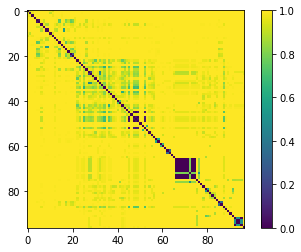

In [244]:
plt.imshow(JaccardMat);
plt.colorbar()
plt.show()

In [521]:
WIntraCD = 0

for cluster in df.ClusterId.unique():
    dfc = df[df.ClusterId==cluster]
    ClstbyIntc = pd.crosstab(dfc["IntervalBinId"],dfc["ClusterId"],margins=True)
    ClstbyIntc = ClstbyIntc.iloc[:, :-1] # drop last row
    ClstbyIntc = ClstbyIntc[:-1] # drop last column
    nclustersc = len(ClstbyIntc.columns)
    JaccardMatc = np.zeros(shape=(nclustersc,nclustersc))
    for i in range(nclustersc):
        for j in range(nclustersc):
            JaccardMatc[i][j] = distance.jaccard(ClstbyIntc.iloc[:,i].values,ClstbyIntc.iloc[:,j].values)
    WIntraCD = WintraCD + np.sum(JaccardMatc)/2

print(WIntraCD)

0.0


In [523]:
nclustersc

1

In [427]:
class TokenClass:
  def __init__(self, TokenId, ClusterId):
    self.TokenId = TokenId
    self.ClusterId = ClusterId
    
token = [TokenClass(i,i) for i in range(len(df.tokens.unique())) ]

In [592]:
##BASED ON TOEKN

WIC = [] #WIntraCD Array. Updated everytime a cluster is merged
ClusterCount = [] #Number of Clusters
JaccardDistanceThreshold = 0.01
ThresholdIncrement = 0.01

df = dfcopy.copy()

TokenIntCrossTab = pd.crosstab(df["IntervalBinId"],df["tokens"],margins=True)
TokenbyIntCrossTab = TokenIntCrossTab.iloc[:, :-1] # drop last row
TokenbyIntCrossTab = TokenIntCrossTab[:-1] # drop last column
ntoken = len(TokenIntCrossTab.columns)
JaccardMat = np.zeros(shape=(ntoken,ntoken))
for i in range(ntoken):
    for j in range(ntoken):
        JaccardMat[i][j] = distance.jaccard(TokenIntCrossTab.iloc[:,i].values,TokenIntCrossTab.iloc[:,j].values)
            

while len(df.ClusterId.unique()) > 1:
    
    for i in range(ntoken):
        for j in range(i+1,ntoken):
            if JaccardMat[i][j]<JaccardDistanceThreshold and df.loc[df.tokens == i,'ClusterId'].values[0] != df.loc[df.tokens == j,'ClusterId'].values[0]:
                print(i,j)
                
                #Merge Clusters
                #print(JaccardMat[i][j])
                print("before change", df.loc[df.tokens == i,'ClusterId'].values[0])
                print("before change", df.loc[df.tokens == j,'ClusterId'].values[0])
                print("before change cluster count", len(df.ClusterId.unique()))
                df.loc[df.tokens == i,'ClusterId'] = df.loc[df.tokens == j,'ClusterId'].values[0]
                #df.loc[df.tokens == i,'ClusterId'] = df.loc[df.tokens == j,'ClusterId'].values[0]
                print("after change",df.loc[df.tokens == i,'ClusterId'].values[0])
                print("after change",df.loc[df.tokens == j,'ClusterId'].values[0])
                
                #Calculate WIntraCD for all clusters after each merge
                WIntraCD = 0
                
                for cluster in df.ClusterId.unique():
                    dfcluster = df[df.ClusterId==cluster]
                    IntraTokenIntCrossTab = pd.crosstab(dfcluster["IntervalBinId"],dfcluster["tokens"],margins=True)
                    IntraTokenIntCrossTab = IntraTokenIntCrossTab.iloc[:, :-1] # drop last row
                    IntraTokenIntCrossTab = IntraTokenIntCrossTab[:-1] # drop last column
                    nIntraTokens = len(IntraTokenIntCrossTab.columns)
                    IntraJaccardMat = np.zeros(shape=(nIntraTokens,nIntraTokens))
                    #Calculate Jaccard distance matric for each cluster
                    for m in range(nIntraTokens):
                        for n in range(m+1,nIntraTokens):
                            IntraJaccardMat[m][n] = distance.jaccard(IntraTokenIntCrossTab.iloc[:,m].values,IntraTokenIntCrossTab.iloc[:,n].values)
                    
                    #Sum the Jaccard distance (weighted) over all clusters
                    WIntraCD = WintraCD + np.sum(IntraJaccardMat)
                
                #After each merge add the value of WIntraCD to array WIC and count of clusters to Clustercount
                WIC.append(WIntraCD)
                ClusterCount.append(len(df.ClusterId.unique()))
                print("after change cluster count", len(df.ClusterId.unique()))
                print("--------")
                
    JaccardDistanceThreshold = JaccardDistanceThreshold + ThresholdIncrement
            
    #WIntraCD = WintraCD + np.sum(JaccardMatc)/2
    #WIC.append(10)



45 48
before change 45
before change 48
before change cluster count 96
after change 48
after change 48
after change cluster count 95
--------
47 49
before change 47
before change 49
before change cluster count 95
after change 49
after change 49
after change cluster count 94
--------
66 67
before change 66
before change 67
before change cluster count 94
after change 67
after change 67
after change cluster count 93
--------
66 68
before change 67
before change 68
before change cluster count 93
after change 68
after change 68
after change cluster count 93
--------
66 69
before change 68
before change 69
before change cluster count 93
after change 69
after change 69
after change cluster count 93
--------
66 70
before change 69
before change 70
before change cluster count 93
after change 70
after change 70
after change cluster count 93
--------
66 71
before change 70
before change 71
before change cluster count 93
after change 71
after change 71


KeyboardInterrupt: 

In [609]:
##BASED ON CLUSTER

WIC = [] #WIntraCD Array. Updated everytime a cluster is merged
ClusterCount = [] #Number of Clusters
JaccardDistanceThreshold = 0.01
ThresholdIncrement = 0.01

df = dfcopy.copy()
           
ClustersMerged = 0
while len(df.ClusterId.unique()) > 1:
    
    print("\n--------")
    print("Total cluster count:", len(df.ClusterId.unique()))
    print("Jaccard Distance Threshold:", JaccardDistanceThreshold)
    
    ClusterIntCrossTab = pd.crosstab(df["IntervalBinId"],df["ClusterId"],margins=True)
    ClusterIntCrossTab = ClusterIntCrossTab.iloc[:, :-1] # drop last row
    ClusterIntCrossTab = ClusterIntCrossTab[:-1] # drop last column
    ncluster = len(ClusterIntCrossTab.columns)
    print("ncluster:", ncluster)
    JaccardMat = np.zeros(shape=(ncluster,ncluster))
    for i in range(ncluster):
        for j in range(ncluster):
            JaccardMat[i][j] = distance.jaccard(ClusterIntCrossTab.iloc[:,i].values,ClusterIntCrossTab.iloc[:,j].values)
    
    for i in range(ncluster):
        for j in range(i+1,ncluster):
            if JaccardMat[i][j]<JaccardDistanceThreshold and df.loc[df.ClusterId == i,'ClusterId'].values[0] != df.loc[df.ClusterId == j,'ClusterId'].values[0]:
                print("Merging Clusters ..")
                print(i,j)
                
                #Merge Clusters
                
                ClustersMerged += 1
                
                print("\n Before merge: ")
                print("   ClusterId changed from", df.loc[df.ClusterId == i,'ClusterId'].values[0])
                print("   ClusterId changed to", df.loc[df.ClusterId == j,'ClusterId'].values[0])
                print("   # of tokens in ClusterID",i,"is",df.loc[df.ClusterId == i,'ClusterId'].count())
                print("   # of tokens in ClusterID",j,"is",df.loc[df.ClusterId == j,'ClusterId'].count())
                
                df.loc[df.ClusterId == i,'ClusterId'] = df.loc[df.ClusterId == j,'ClusterId'].values[0]
                print("\n After merge: ")
                print("   # of tokens in ClusterID",i,"is",df.loc[df.ClusterId == i,'ClusterId'].count())
                print("   # of tokens in ClusterID",j,"is",df.loc[df.ClusterId == j,'ClusterId'].count())
                                
                #Calculate WIntraCD for all clusters after each merge
                print("\nCalculate WIC ..")
                WIntraCD = 0
                
                for cluster in df.ClusterId.unique():
                    dfcluster = df[df.ClusterId==cluster]
                    IntraTokenIntCrossTab = pd.crosstab(dfcluster["IntervalBinId"],dfcluster["tokens"],margins=True)
                    IntraTokenIntCrossTab = IntraTokenIntCrossTab.iloc[:, :-1] # drop last row
                    IntraTokenIntCrossTab = IntraTokenIntCrossTab[:-1] # drop last column
                    nIntraTokens = len(IntraTokenIntCrossTab.columns)
                    IntraJaccardMat = np.zeros(shape=(nIntraTokens,nIntraTokens))
                    #Calculate Jaccard distance matric for each cluster
                    for m in range(nIntraTokens):
                        for n in range(m+1,nIntraTokens):
                            IntraJaccardMat[m][n] = distance.jaccard(IntraTokenIntCrossTab.iloc[:,m].values,IntraTokenIntCrossTab.iloc[:,n].values)
                    
                    #Sum the Jaccard distance (weighted) over all clusters
                    WIntraCD = WintraCD + np.sum(IntraJaccardMat)
                
                #After each merge add the value of WIntraCD to array WIC and count of clusters to Clustercount
                WIC.append(WIntraCD)
                ClusterCount.append(len(df.ClusterId.unique()))
                print("\nTotal cluster count after merge: ", len(df.ClusterId.unique()))
                
                break
                
        else:
            continue
        break
        
    if ClustersMerged==0:
        print("No clusters merged")
        JaccardDistanceThreshold = JaccardDistanceThreshold + ThresholdIncrement
        ClustersMerged = 0
        print("Jaccard Distance Threshold changed to:", JaccardDistanceThreshold)
    
                



--------
Total cluster count: 96
Jaccard Distance Threshold: 0.01
ncluster: 96
Merging Clusters ..
44 47

 Before merge: 
   ClusterId changed from 44
   ClusterId changed to 47
   # of tokens in ClusterID 44 is 28
   # of tokens in ClusterID 47 is 75

 After merge: 
   # of tokens in ClusterID 44 is 0
   # of tokens in ClusterID 47 is 103

Calculate WIC ..

Total cluster count after merge:  95

--------
Total cluster count: 95
Jaccard Distance Threshold: 0.01
ncluster: 95
Merging Clusters ..
43 46

 Before merge: 
   ClusterId changed from 43
   ClusterId changed to 46
   # of tokens in ClusterID 43 is 149
   # of tokens in ClusterID 46 is 2

 After merge: 
   # of tokens in ClusterID 43 is 0
   # of tokens in ClusterID 46 is 151

Calculate WIC ..

Total cluster count after merge:  94

--------
Total cluster count: 94
Jaccard Distance Threshold: 0.01
ncluster: 94
Merging Clusters ..
42 45

 Before merge: 
   ClusterId changed from 42
   ClusterId changed to 45
   # of tokens in Clust

IndexError: index 0 is out of bounds for axis 0 with size 0

In [599]:
df.loc[df.ClusterId == 45,'ClusterId'].count()

0

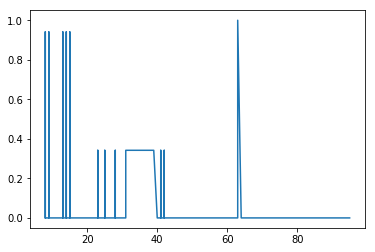

In [589]:
plt.plot(ClusterCount,WIC)

In [580]:
WIC = [] #WIntraCD Array. Updated everytime a cluster is merged
ClusterCount = [] #Number of Clusters
JaccardDistanceThreshold = 0.01
ThresholdIncrement = 0.01

df = dfcopy.copy()

TokenIntCrossTab = pd.crosstab(df["IntervalBinId"],df["tokens"],margins=True)
TokenbyIntCrossTab = TokenIntCrossTab.iloc[:, :-1] # drop last row
TokenbyIntCrossTab = TokenIntCrossTab[:-1] # drop last column
ntoken = len(TokenIntCrossTab.columns)
JaccardMat = np.zeros(shape=(ntoken,ntoken))
for i in range(ntoken):
    for j in range(ntoken):
        JaccardMat[i][j] = distance.jaccard(TokenIntCrossTab.iloc[:,i].values,TokenIntCrossTab.iloc[:,j].values)
            
counter = 1
for WICloop in range(1):
    
    for i in range(ntoken):
        for j in range(i+1,ntoken):
            if counter < 5 and JaccardMat[i][j]<JaccardDistanceThreshold and df.loc[df.tokens == i,'ClusterId'].values[0] != df.loc[df.tokens == j,'ClusterId'].values[0]:
                print(i,j)
                counter += 1
                #Merge Clusters
                #print(JaccardMat[i][j])
                print("before change", df.loc[df.tokens == i,'ClusterId'].values[0])
                print("before change", df.loc[df.tokens == j,'ClusterId'].values[0])
                print("before change cluster count", len(df.ClusterId.unique()))
                df.loc[df.tokens == i,'ClusterId'] = df.loc[df.tokens == j,'ClusterId'].values[0]
                print("after change",df.loc[df.tokens == i,'ClusterId'].values[0])
                print("after change",df.loc[df.tokens == j,'ClusterId'].values[0])
                
                #Calculate WIntraCD for all clusters after each merge
                WIntraCD = 0
                
    #WIntraCD = WintraCD + np.sum(JaccardMatc)/2
    #WIC.append(10)
    
  



45 48
before change 45
before change 48
before change cluster count 96
after change 48
after change 48
47 49
before change 47
before change 49
before change cluster count 95
after change 49
after change 49
66 67
before change 66
before change 67
before change cluster count 94
after change 67
after change 67
66 68
before change 67
before change 68
before change cluster count 93
after change 68
after change 68


In [583]:
df[df.ClusterId == 68]

,SystemContext,MachineName,MessageSourceId,LogTime,Severity,Message,ProgramName,ProcessOSUser,MessageId,EventId,EventTemplate,Date,Time,hour,tokens,ClusterId,IntervalBin,IntervalBinId
Id,,,,,,,,,,,,,,,,,,
73447201677,2501328,SVPNAPI01,21422,01-Nov-18 03:50:33,4,Successfully loaded archive file H:\PI\Dat\svp...,piarchss,SYSTEM,2076,2b75a297,Successfully loaded archive file H:\PI\Dat\svp...,2018-11-01,03:50:33,3,66,68,2018-11-01 03:50:00,23
73447201679,2501328,SVPNAPI01,21422,01-Nov-18 03:50:33,4,Beginning Archive Shift. Current Primary Archi...,piarchss,SYSTEM,2059,8dd7e932,Beginning Archive Shift. Current Primary Archi...,2018-11-01,03:50:33,3,68,68,2018-11-01 03:50:00,23
73455683059,2501328,SVPNAPI01,21422,01-Nov-18 08:01:32,4,Successfully loaded archive file H:\PI\Dat\svp...,piarchss,SYSTEM,2076,2b75a297,Successfully loaded archive file H:\PI\Dat\svp...,2018-11-01,08:01:32,8,66,68,2018-11-01 08:00:00,48
73455683061,2501328,SVPNAPI01,21422,01-Nov-18 08:01:32,4,Beginning Archive Shift. Current Primary Archi...,piarchss,SYSTEM,2059,8dd7e932,Beginning Archive Shift. Current Primary Archi...,2018-11-01,08:01:32,8,68,68,2018-11-01 08:00:00,48
73464033720,2501328,SVPNAPI01,21422,01-Nov-18 12:06:33,4,Successfully loaded archive file H:\PI\Dat\svp...,piarchss,SYSTEM,2076,2b75a297,Successfully loaded archive file H:\PI\Dat\svp...,2018-11-01,12:06:33,12,66,68,2018-11-01 12:00:00,72
73464033722,2501328,SVPNAPI01,21422,01-Nov-18 12:06:33,4,Beginning Archive Shift. Current Primary Archi...,piarchss,SYSTEM,2059,8dd7e932,Beginning Archive Shift. Current Primary Archi...,2018-11-01,12:06:33,12,68,68,2018-11-01 12:00:00,72
73472440148,2501328,SVPNAPI01,21422,01-Nov-18 16:06:33,4,Successfully loaded archive file H:\PI\Dat\svp...,piarchss,SYSTEM,2076,2b75a297,Successfully loaded archive file H:\PI\Dat\svp...,2018-11-01,16:06:33,16,66,68,2018-11-01 16:00:00,96
73472440150,2501328,SVPNAPI01,21422,01-Nov-18 16:06:33,4,Beginning Archive Shift. Current Primary Archi...,piarchss,SYSTEM,2059,8dd7e932,Beginning Archive Shift. Current Primary Archi...,2018-11-01,16:06:33,16,68,68,2018-11-01 16:00:00,96
73481509449,2501328,SVPNAPI01,21422,01-Nov-18 20:26:33,4,Successfully loaded archive file H:\PI\Dat\svp...,piarchss,SYSTEM,2076,2b75a297,Successfully loaded archive file H:\PI\Dat\svp...,2018-11-01,20:26:33,20,66,68,2018-11-01 20:20:00,122


In [513]:
df = dfcopy.copy()

In [463]:
dfcopy.loc[dfcopy.tokens == 0,'ClusterId'] = dfcopy.loc[dfcopy.tokens == 1,'ClusterId'][0]

In [512]:
dfcopy.loc[dfcopy.tokens == 95,'ClusterId'].values[0]

95

In [534]:
len(df.ClusterId.unique())

85

In [539]:
ClusterCount= [len(df.ClusterId.unique())]

In [567]:
ClusterCount = []
ClusterCount.append(len(df.ClusterId.unique()))
ClusterCount.append(10)
ClusterCount

[85, 10]

In [560]:
ClusterCount.dtype

AttributeError: 'NoneType' object has no attribute 'dtype'

In [564]:
np.array(ClusterCount)

array(None, dtype=object)

In [556]:
ClusterCount.values

AttributeError: 'NoneType' object has no attribute 'values'

In [571]:
len(WIC)

32

In [573]:
ClusterCount

[95,
 94,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 92,
 92,
 92,
 92,
 92,
 92,
 91,
 91,
 91,
 91,
 91,
 90,
 90,
 90,
 90,
 89,
 89,
 89,
 88,
 88,
 87,
 86,
 85]

In [611]:
pd.factorize(df.EventId)[0]

array([ 0,  1,  2, ...,  2, 10, 11], dtype=int64)